In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

bookings = pd.DataFrame(pd.read_csv('bookings.csv', index_col='calendar_date', parse_dates=True, infer_datetime_format=True,)).loc['2018-08-01':'2018-08-31'].reset_index()
costs = pd.DataFrame(pd.read_csv('costs.csv', index_col='calendar_date', parse_dates=True, infer_datetime_format=True,)).loc['2018-08-01':'2018-08-31'].reset_index()
revenue = pd.DataFrame(pd.read_csv('revenue.csv', index_col='calendar_date', parse_dates=True, infer_datetime_format=True,)).loc['2018-08-01':'2018-08-31'].reset_index()


result = pd.merge(costs, bookings, on=['tracking_key','calendar_date'])
result = pd.merge(result, revenue, on=['tracking_key','calendar_date'])

In [2]:
# print (result.columns)


# # get all columns from merge that are type (float64)
# num_cols = result.select_dtypes('float64').columns.values

# # attempt to get all columns from merge that are type (object)
# non_num_cols = result.select_dtypes('object').columns.values[1:]
# #


# # hardcode retarded columns from merge that are useful
# non_num_cols = ['platform', 'campaign_strategy', 'channel', 'dim_origin_region']
# num_cols = ['cost', 'clicks', 'revenue']

# result_log = result.copy()
# result_log[num_cols] = np.log(result_log[num_cols])

# for x in num_cols:
#     for y in num_cols:
#         for col in non_num_cols:
#             for hue in non_num_cols:
#                 print (x,y,col,hue)
#                 # dont do redundant x vs x plots or col=hue plots
#                 if (x != y) & (col != hue):
#                     sns.lmplot(x=x, y=y, col=col, hue=hue, 
#                                data=result_log, col_wrap=2,
#                                line_kws={"alpha":0.5},
#                                scatter_kws={"alpha": 0.5, 's': 10})
#                     plt.show()

In [3]:
# non_num_cols = ['campaign_strategy', 'channel']
# num_cols = ['cost', 'clicks', 'revenue']

# australia_google = result[(result['dim_origin_region'] == 'Australia') & (result['platform'] == 'google')]

# for x in num_cols:
#     for y in num_cols:
#         for col in non_num_cols:
#             for hue in non_num_cols:
#                 print (x,y,col,hue)
#                 # dont do redundant x vs x plots or col=hue plots
#                 if (x != y) & (col != hue):
#                     sns.lmplot(x=x, y=y, col=col, hue=hue, 
#                                data=result_log, col_wrap=2,
#                                line_kws={"alpha":0.5},
#                                scatter_kws={"alpha": 0.5, 's': 10})
#                     plt.show()



is_remarketing
is_remarketing


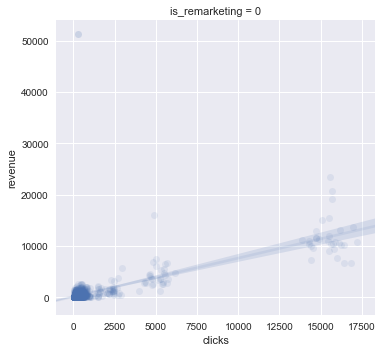

is_remarketing


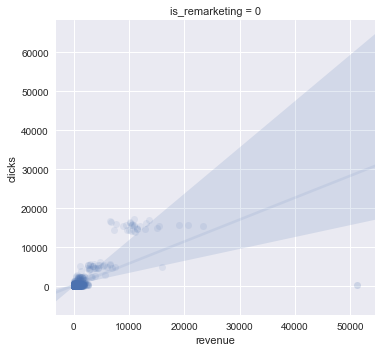

is_remarketing


In [4]:
australia_google = result[(result['dim_origin_region'] == 'Australia') & (result['platform'] == 'google')]
australia_google = australia_google[australia_google['channel'] == 'SEM Non-brand']

num_cols = ['clicks','revenue']
non_num_cols = ['is_remarketing']


for x in num_cols: #dynamically slices x and y axis by each measure (iterates through every combination)
    for y in num_cols: 
        for col in non_num_cols: 
            print (col)
            if (x != y) : #prevents redundant slice combinations like impressions vs impressions. #
                sns.lmplot(x=x, y=y, col=col,  
                             data=australia_google, col_wrap=2,
                             line_kws={"alpha":0.1},
                             scatter_kws={"alpha": 0.1})
                plt.show()

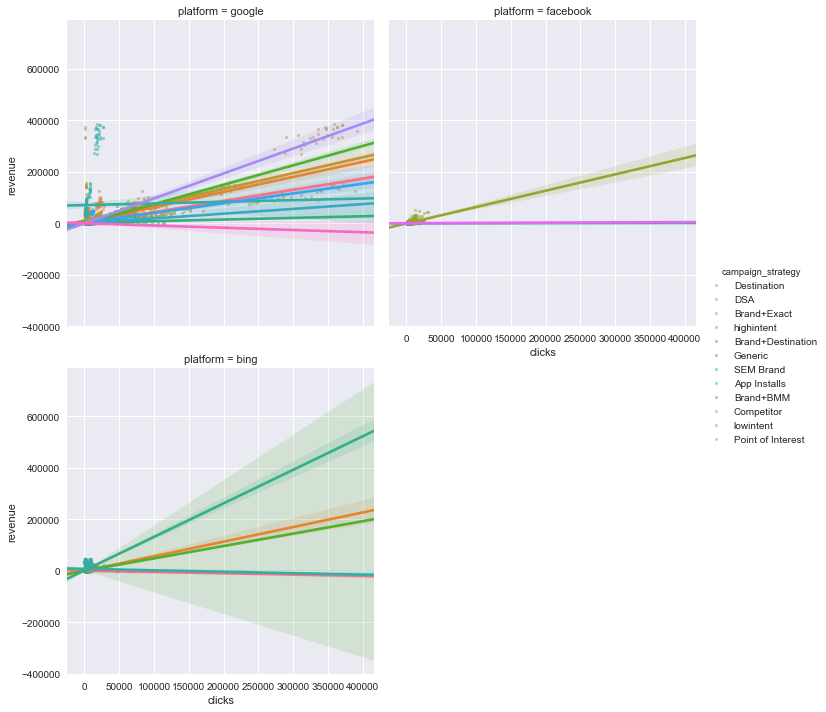

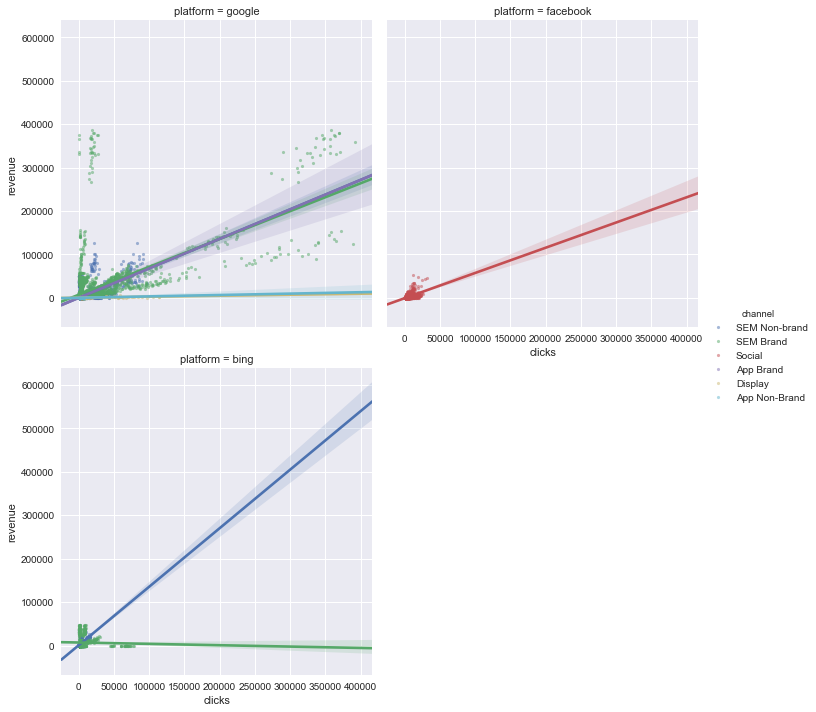

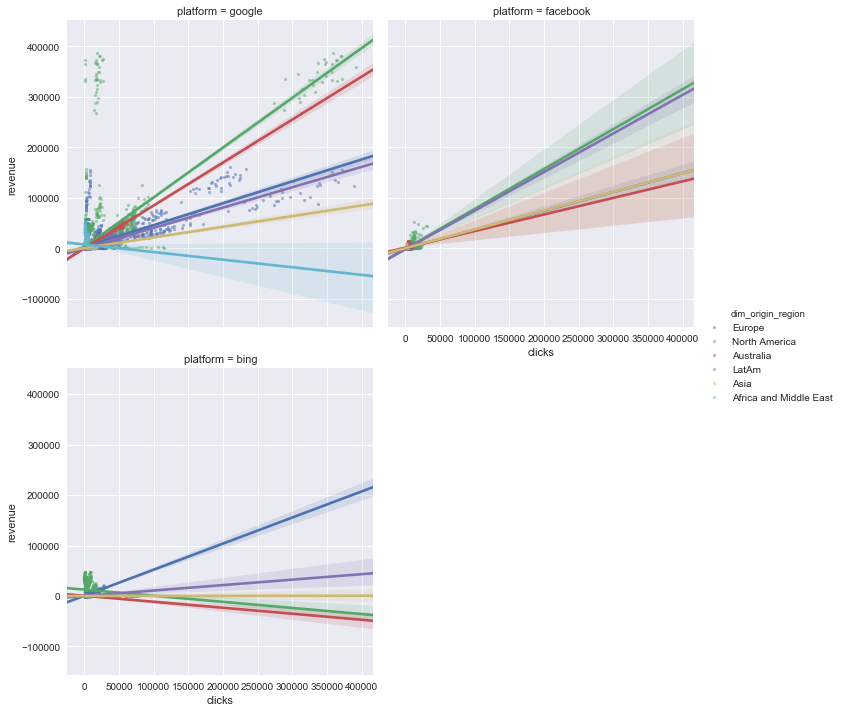

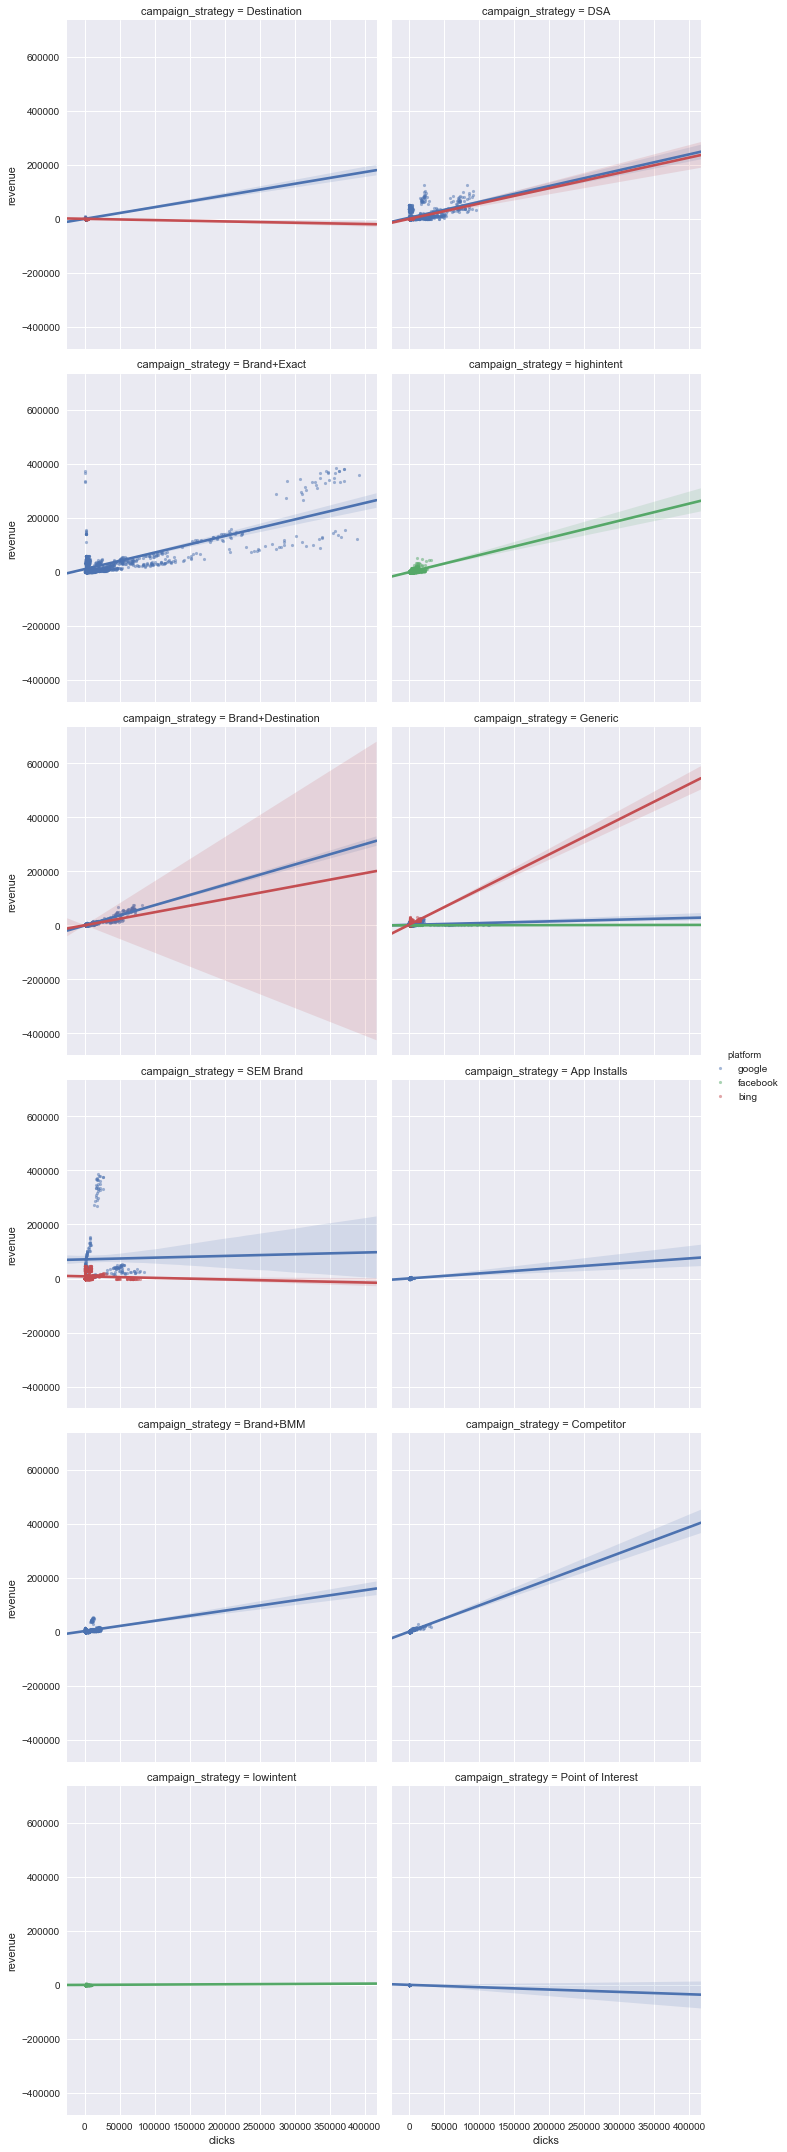

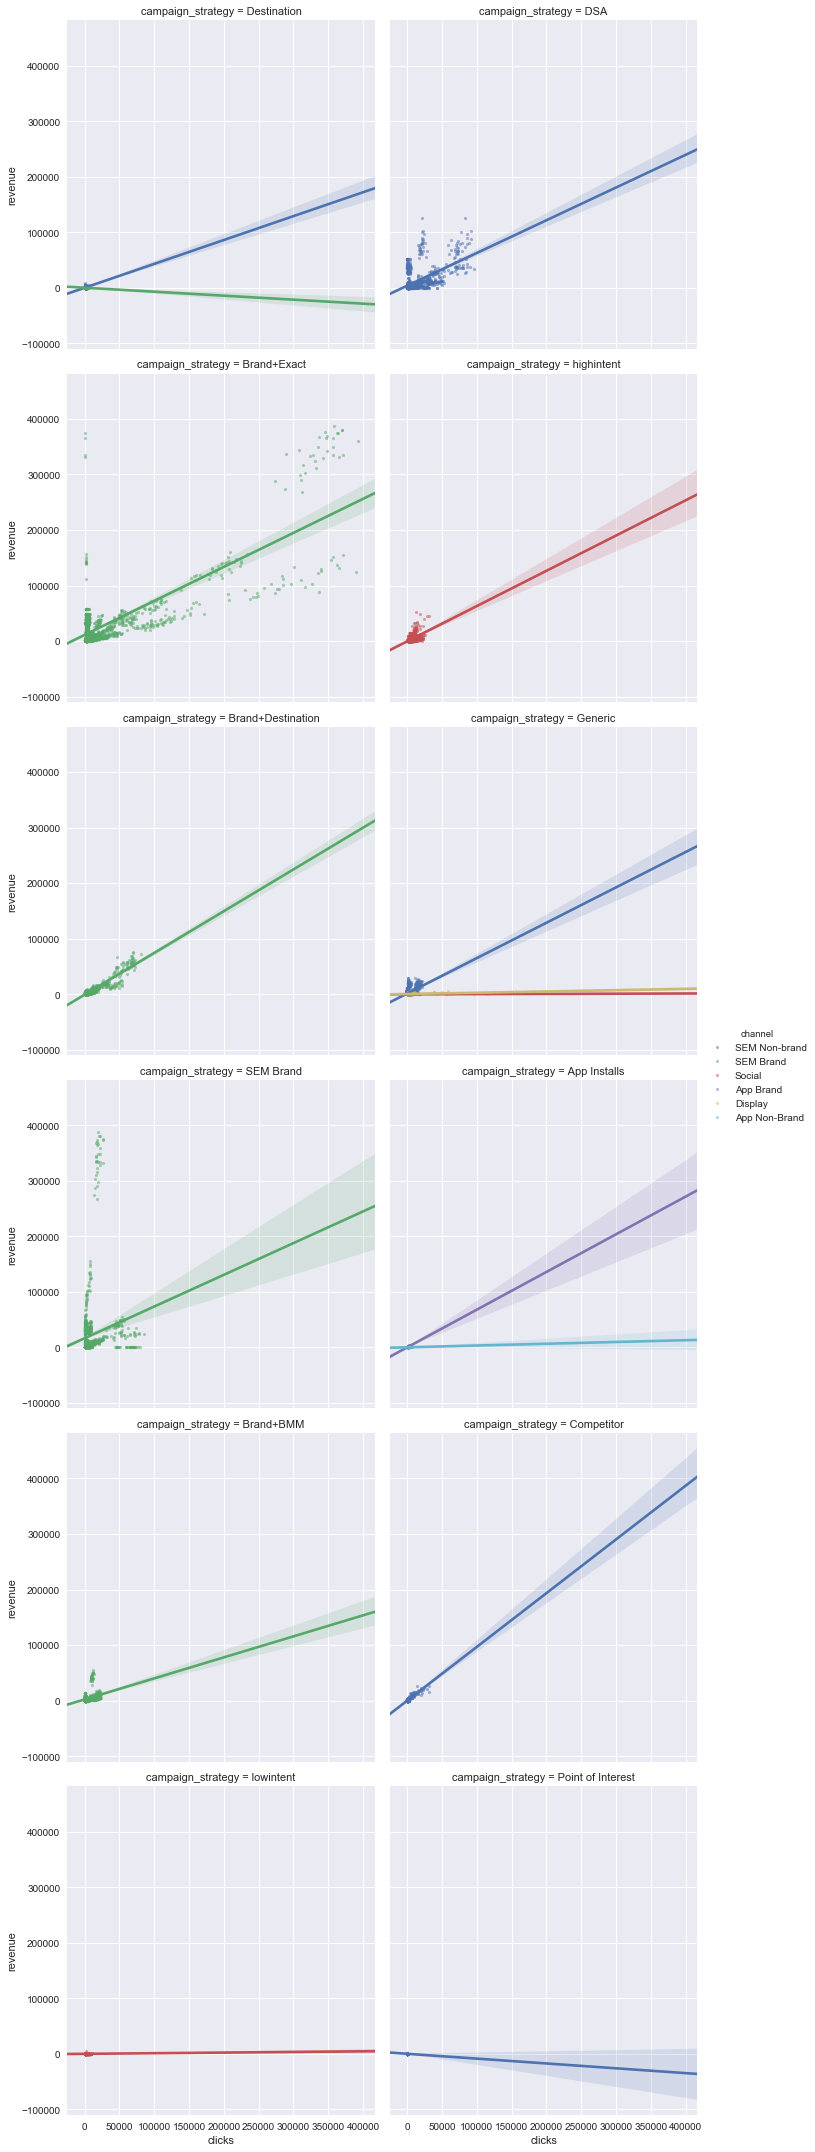

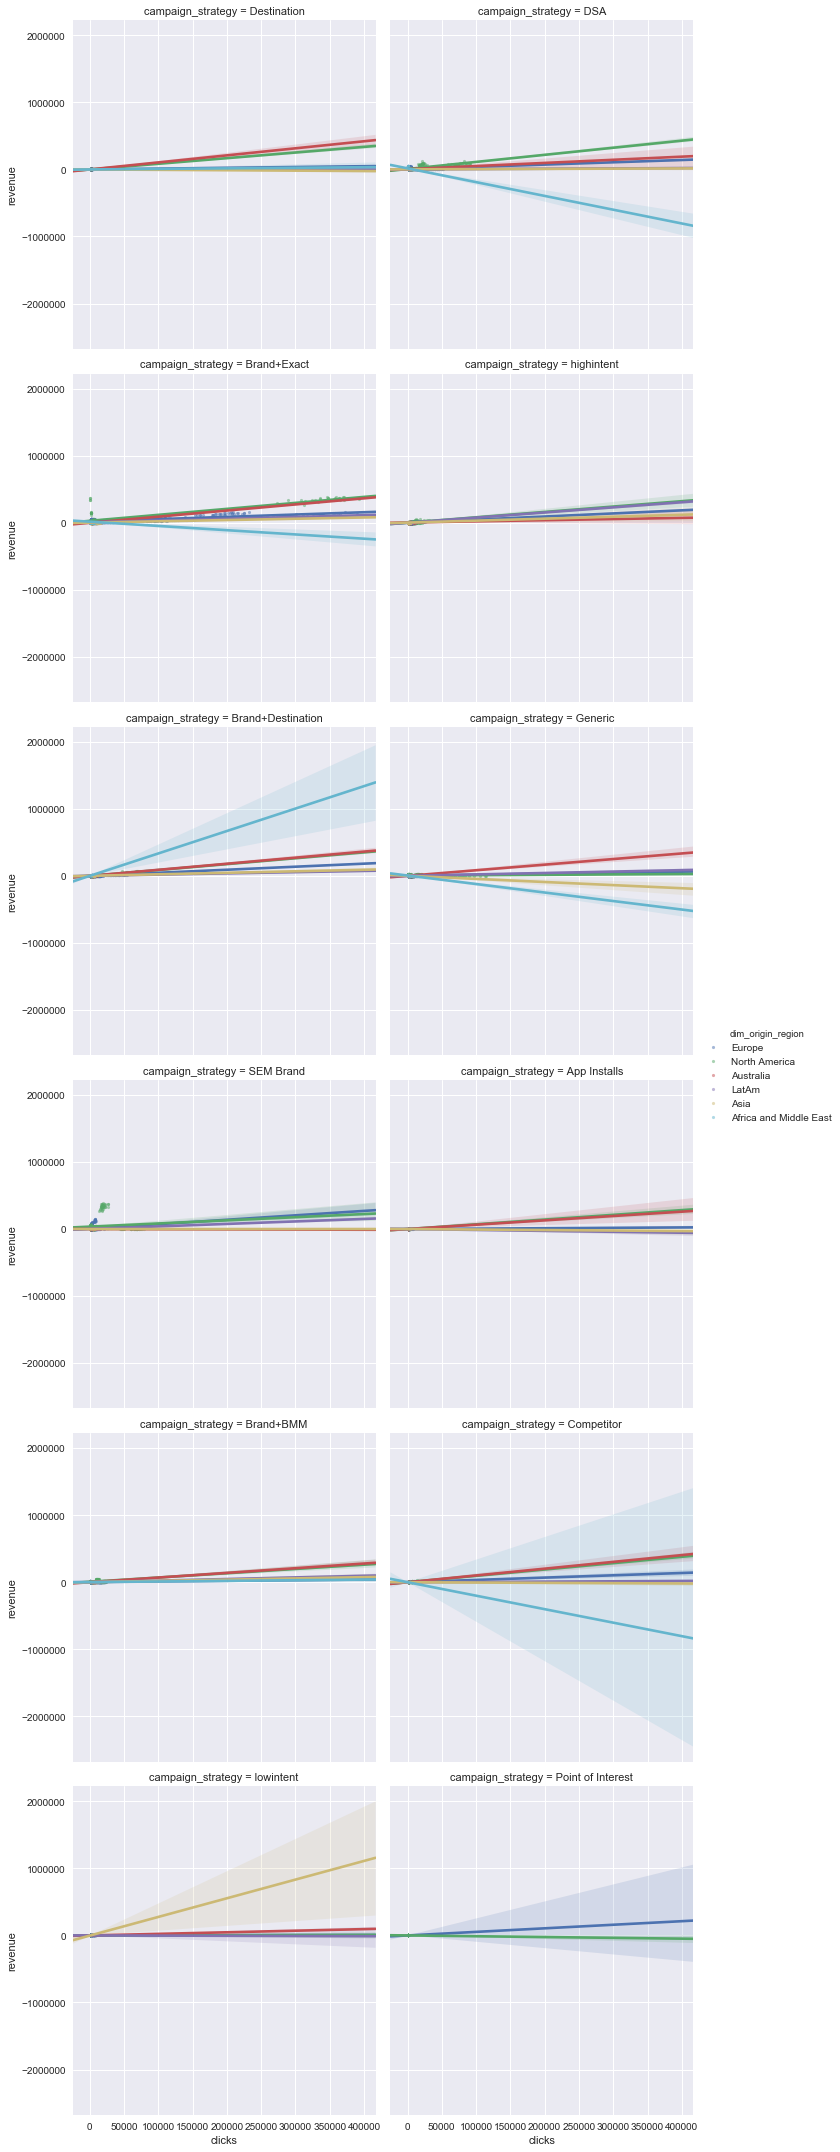

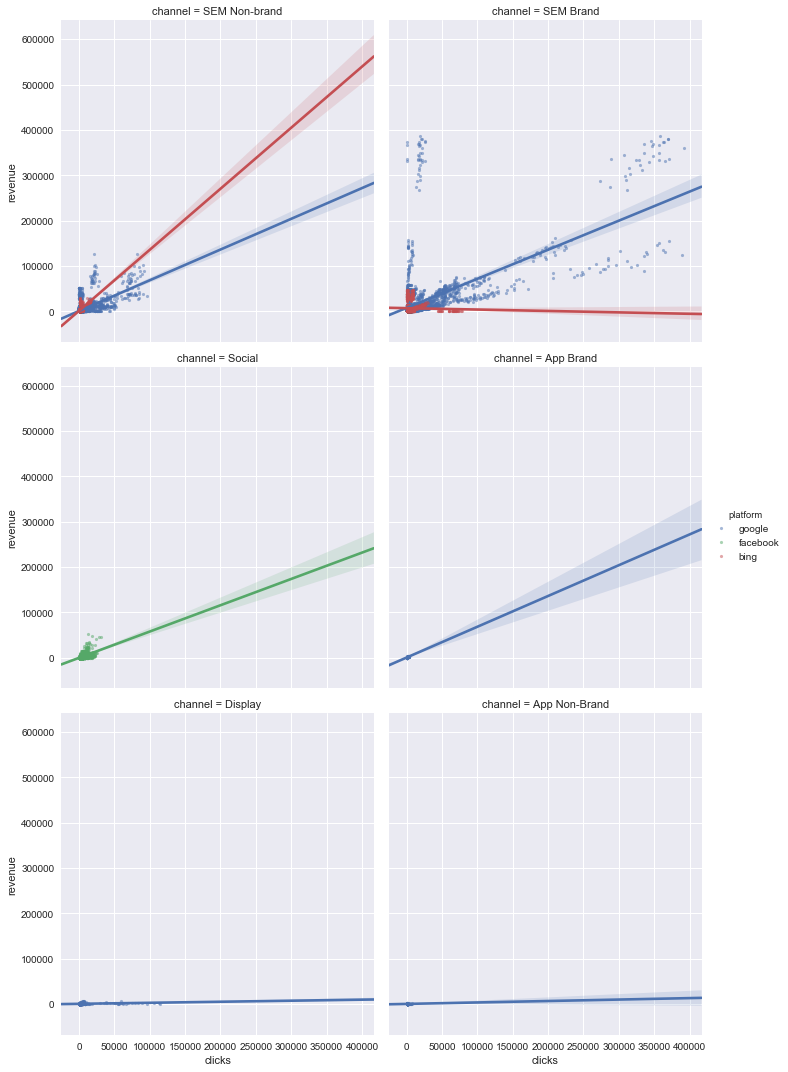

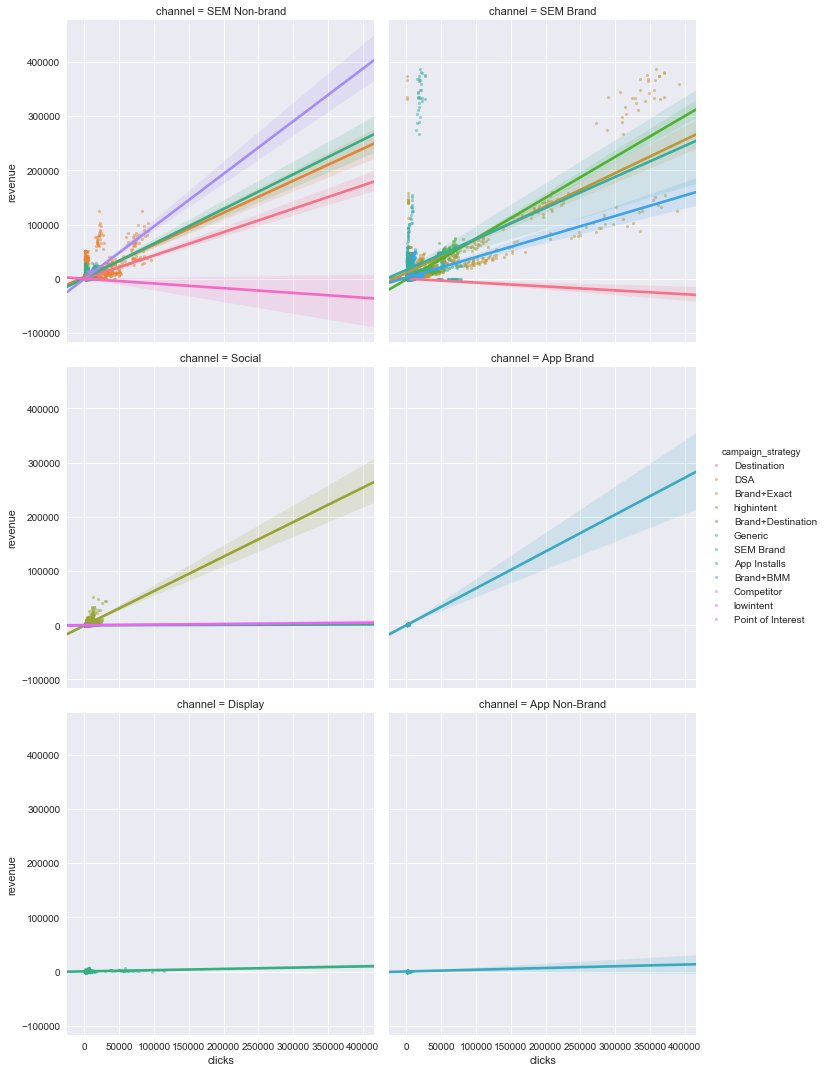

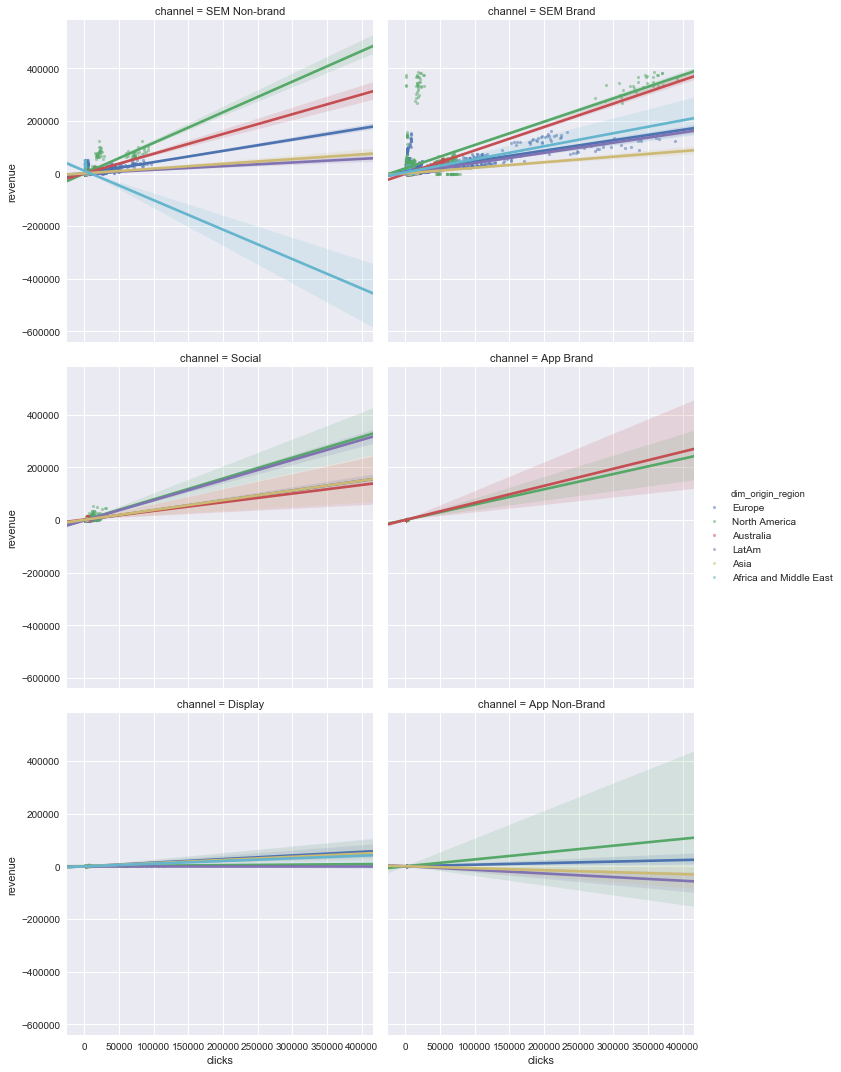

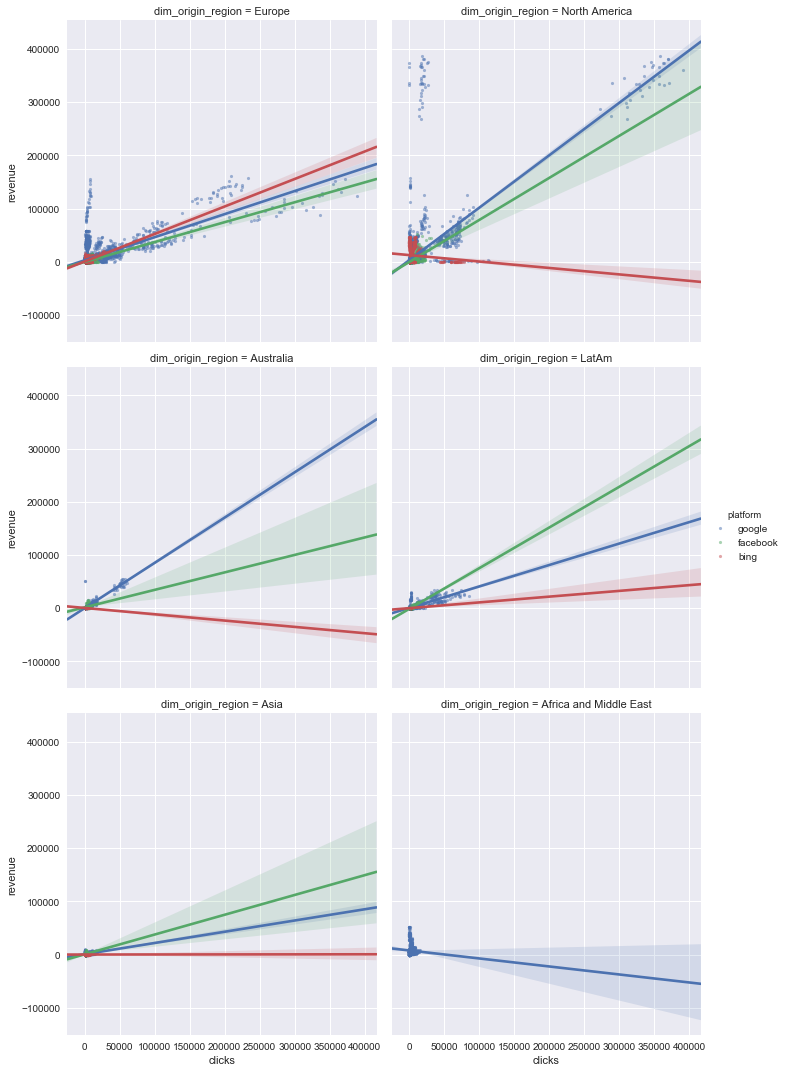

KeyboardInterrupt: 

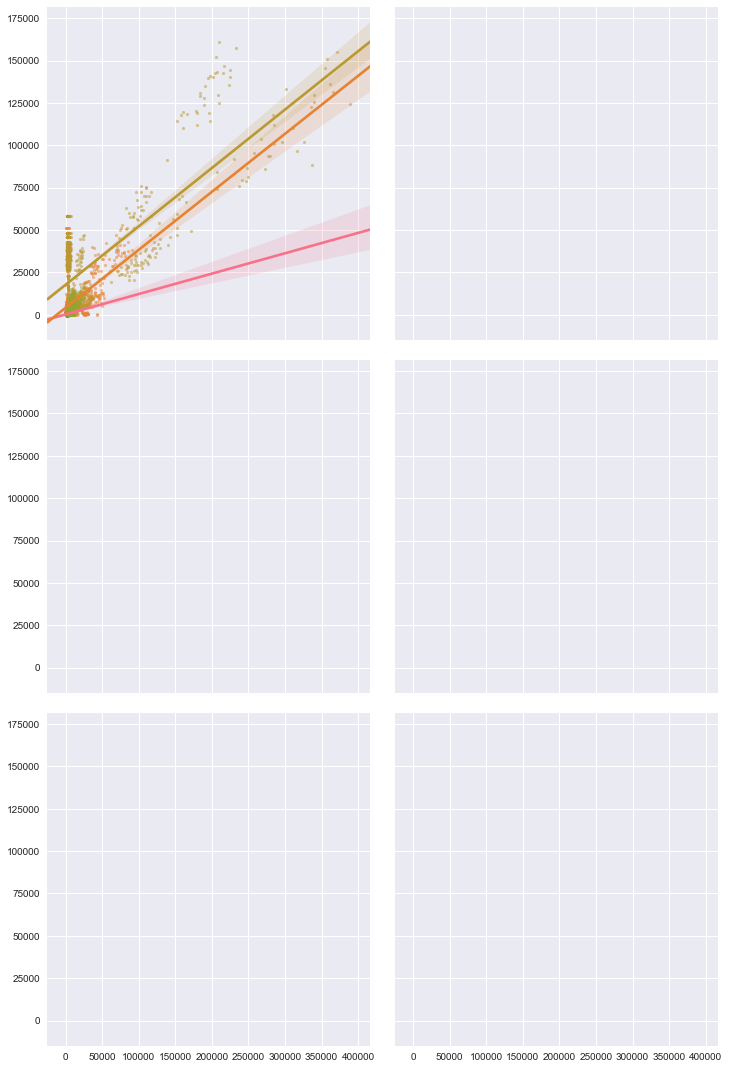

In [6]:
non_num_cols = ['platform', 'campaign_strategy', 'channel', 'dim_origin_region']
num_cols = ['cost', 'clicks', 'revenue']

result_log = result.copy()
# result_log[num_cols] = np.log(result_log[num_cols])


for col in non_num_cols:
    for hue in non_num_cols:
        if (col != hue):
            sns.lmplot(x='clicks', y='revenue', col=col, hue=hue, 
                       data=result_log, col_wrap=2,
                       line_kws={"alpha":1},
                       scatter_kws={"alpha": 0.5, 's': 10})
            plt.show()

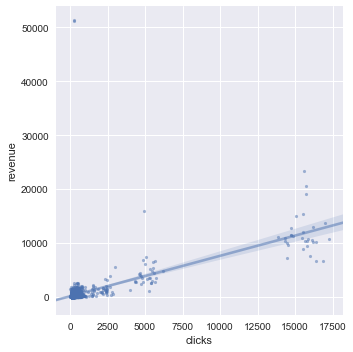

In [42]:
australia_google_SEMNB = result[(result['dim_origin_region'] == 'Australia') & (result['platform'] == 'google') & (result['channel'] == 'SEM Non-brand')]

sns.lmplot(x='clicks', y='revenue',
         data=australia_google_SEMNB,
         line_kws={"alpha":0.5},
         scatter_kws={"alpha": 0.5, 's': 10},
          fit_reg=True)
plt.show()

In [43]:
aust_len = float(len(result[result['dim_origin_region'] == 'Australia']))
aust_google_len = float(len(result[(result['dim_origin_region'] == 'Australia') & (result['platform'] == 'google')]))
aust_google_sem_len = float(len(result[(result['dim_origin_region'] == 'Australia') & (result['platform'] == 'google') & (result['channel'] == 'SEM Non-brand')]))

print (aust_len / len(result))
print (aust_google_len / aust_len)
print (aust_google_sem_len / aust_google_len)

print (aust_google_sem_len / len(result))

0.09181168315401834
0.900904443570586
0.8838934962898297
0.07310997183912196


In [44]:
aust = result[result['dim_origin_region'] == 'Australia']
aust_google = result[(result['dim_origin_region'] == 'Australia') & (result['platform'] == 'google')]
aust_google_sem = result[(result['dim_origin_region'] == 'Australia') & (result['platform'] == 'google') & (result['channel'] == 'SEM Non-brand')]

def print_costs(df, df_name):
    
    # for the df, find the revenue/cost/clicks sum and print "df_name rev/cost/clicks: value" with 2 decimal places
    print ('{} revenue: {:.2f} '.format(df_name, df.revenue.sum()))
    print ('{} cost: {:.2f} '.format(df_name, df.cost.sum()))
    print ('{} clicks: {:.2f} '.format(df_name, df.clicks.sum()))
    print ('\n')
    
    # for result, find the revenue/cost/clicks sum and print "total rev/cost/clicks: value" with 2 decimal places
    print ('total revenue: {:.2f}'.format(result.revenue.sum()))
    print ('total cost: {:.2f}'.format(result.cost.sum()))
    print ('total clicks: {:.2f}'.format(result.clicks.sum()))
    print ('\n')
    
    # for the df/result, find the revenue/cost/clicks sum and print "df_name / total rev/cost/clicks: value" with 2 decimal places
    print ('{} / total revenume: {:.5f}'.format(df_name, df.revenue.sum() / result.revenue.sum()))
    print ('{} / total cost: {:.5f}'.format(df_name, df.cost.sum() / result.cost.sum()))
    print ('{} / total clicks: {:.5f}'.format(df_name, df.clicks.sum() / result.clicks.sum()))
    print ('--'*20)
    print ('\n')
    
    
    
print_costs(aust, 'australia')
print_costs(aust_google, 'australia_google')
print_costs(aust_google_sem, 'australia_google_sem')


australia revenue: 3960522.93 
australia cost: 3724749.67 
australia clicks: 4714548.00 


total revenue: 133303855.23
total cost: 61961318.10
total clicks: 126535847.00


australia / total revenume: 0.02971
australia / total cost: 0.06011
australia / total clicks: 0.03726
----------------------------------------


australia_google revenue: 3569606.04 
australia_google cost: 3432001.10 
australia_google clicks: 4087543.00 


total revenue: 133303855.23
total cost: 61961318.10
total clicks: 126535847.00


australia_google / total revenume: 0.02678
australia_google / total cost: 0.05539
australia_google / total clicks: 0.03230
----------------------------------------


australia_google_sem revenue: 1150288.23 
australia_google_sem cost: 2829189.02 
australia_google_sem clicks: 1184593.00 


total revenue: 133303855.23
total cost: 61961318.10
total clicks: 126535847.00


australia_google_sem / total revenume: 0.00863
australia_google_sem / total cost: 0.04566
australia_google_sem / total 